### Importing Libraries and Data Frames

In [35]:
import pandas as pd
import numpy as np

from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder
import pickle

In [36]:
# Load the dataframe from a csv file
df = pd.read_csv('CensusAdultIncome.csv')


### Exploring the Data Frames

In [37]:
df.head()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [38]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48842 entries, 0 to 48841
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             48842 non-null  int64 
 1   workclass       47879 non-null  object
 2   fnlwgt          48842 non-null  int64 
 3   education       48842 non-null  object
 4   education-num   48842 non-null  int64 
 5   marital-status  48842 non-null  object
 6   occupation      47876 non-null  object
 7   relationship    48842 non-null  object
 8   race            48842 non-null  object
 9   sex             48842 non-null  object
 10  capital-gain    48842 non-null  int64 
 11  capital-loss    48842 non-null  int64 
 12  hours-per-week  48842 non-null  int64 
 13  native-country  48568 non-null  object
 14  income          48842 non-null  object
dtypes: int64(6), object(9)
memory usage: 5.6+ MB


- workclass: A categorical feature representing the type of income, such as private, self-employment, and government employment. Some missing values present.
- fnlwgt: An integer feature with no description provided. No missing values.
- education: A categorical feature representing the level of education 
- education-num: An integer feature representing the numerical encoding of **education** level.
- occupation: A categorical feature representing the type of occupation, such as managerial, technical, and service-related occupations. Some missing values present.
- native-country: A categorical feature representing the country of origin, including various countries such as the United States, Canada, and India. Some missing values present.
- income: The target variable, a binary feature representing income level, with categories >50K and <=50K. No missing values.

####  Cleaning the target .

In [39]:
#Target value has values with dots, therefore 4 catagories
df['income'] = df['income'].str.replace('.', '')

# Replace the values in the target column with string '0' and '1'.
df['income'] = df['income'].str.replace('<=50K', '0')  
df['income'] = df['income'].str.replace('>50K', '1')   

# Convert to integer
df['income'] = df['income'].astype(int)

C:\Users\dideu\AppData\Local\Temp\ipykernel_14584\3457457334.py:2: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  df['income'] = df['income'].str.replace('.', '')


In [40]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48842 entries, 0 to 48841
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             48842 non-null  int64 
 1   workclass       47879 non-null  object
 2   fnlwgt          48842 non-null  int64 
 3   education       48842 non-null  object
 4   education-num   48842 non-null  int64 
 5   marital-status  48842 non-null  object
 6   occupation      47876 non-null  object
 7   relationship    48842 non-null  object
 8   race            48842 non-null  object
 9   sex             48842 non-null  object
 10  capital-gain    48842 non-null  int64 
 11  capital-loss    48842 non-null  int64 
 12  hours-per-week  48842 non-null  int64 
 13  native-country  48568 non-null  object
 14  income          48842 non-null  int32 
dtypes: int32(1), int64(6), object(8)
memory usage: 5.4+ MB


Print count and percentage of classes variable

In [41]:
# Calculate the counts of unique values in the 'class' column 
class_counts = df['income'].value_counts()

# Calculate the percentage of each unique value in the 'class' column by dividing 'class_counts' by its sum and then multiplying by 100.
class_percentages = class_counts / class_counts.sum() * 100

print('Class counts:\n' ,class_counts, '\n')
print('Percentage of each class: \n' ,class_percentages)
print('\nTotal number of rows: ', df.shape[0])

# Saving this for future use
a = df.shape[0]

Class counts:
 0    37155
1    11687
Name: income, dtype: int64 

Percentage of each class: 
 0    76.071823
1    23.928177
Name: income, dtype: float64

Total number of rows:  48842


#### Cleaning features dataframe

In [42]:
#Some values are like '?'. Replacing them as NaN 
df[df == '?'] = np.nan

In [43]:
# Dropping the rows with NaN values in  'workclass', 'occupation', 'native-country' for the test dataset
df.dropna(subset=['workclass', 'occupation', 'native-country'], inplace=True)
df.dropna( inplace=True)

Checking wheter Education and Education-number are similar.

In [44]:
print(df['education'].value_counts().head())
print()
print(df['education-num'].value_counts().head())

HS-grad         14783
Some-college     9899
Bachelors        7570
Masters          2514
Assoc-voc        1959
Name: education, dtype: int64

9     14783
10     9899
13     7570
14     2514
11     1959
Name: education-num, dtype: int64


In [45]:
# From X set, education column is dropped as it is same with Education-num, which is already in numerical form.
df = df.drop(['education'], axis=1)

In [46]:
df.head()

,age,workclass,fnlwgt,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
0,39,State-gov,77516,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,0
1,50,Self-emp-not-inc,83311,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,0
2,38,Private,215646,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,0
3,53,Private,234721,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,0
4,28,Private,338409,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,0


# Count and percentage of Target classes values after droping NaN values 


In [47]:
# Calculate the counts of unique values in the 'class' column of 'df_class_feature' and store it in 'class_counts'.
class_counts = df['income'].value_counts()

# Calculate the percentage of each unique value in the 'class' column by dividing 'class_counts' by its sum and then multiplying by 100.
class_percentages = class_counts / class_counts.sum() * 100

print('Class counts:\n' ,class_counts, '\n')
print('Percentage of each class: \n' ,class_percentages)

b = df.shape[0]
print('\nNumber of rows after dropping NaN: ', b)
print('number of rows dropped: ', a-b)

Class counts:
 0    34014
1    11208
Name: income, dtype: int64 

Percentage of each class: 
 0    75.215603
1    24.784397
Name: income, dtype: float64

Number of rows after dropping NaN:  45222
number of rows dropped:  3620


### Creating X and y sets

In [48]:
# From X set, education column is also dropped as it is similar to Education-num
X = df.drop(['income', 'native-country', 'occupation'], axis=1)

y = df['income']

# Split data into separate fitting and test set

In [49]:
# Split the dataset into fitting data (80%) and test set (20%)
X_fit, X_test, y_fit, y_test = train_test_split(X, y, test_size=0.2, random_state=1)

# Okay

In [50]:
X_fit.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 36177 entries, 4727 to 35636
Data columns (total 11 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             36177 non-null  int64 
 1   workclass       36177 non-null  object
 2   fnlwgt          36177 non-null  int64 
 3   education-num   36177 non-null  int64 
 4   marital-status  36177 non-null  object
 5   relationship    36177 non-null  object
 6   race            36177 non-null  object
 7   sex             36177 non-null  object
 8   capital-gain    36177 non-null  int64 
 9   capital-loss    36177 non-null  int64 
 10  hours-per-week  36177 non-null  int64 
dtypes: int64(6), object(5)
memory usage: 3.3+ MB


#### The percentage of each class in the target variable for each set

In [51]:
# Defined a function to calculate  and print the percentage of each class in the target variable
def calculate_class_percentage(y):
    class_percentage = {}
    total_samples = len(y)
    unique_classes = set(y)
    
    for cls in unique_classes:
        class_count = sum(y == cls)
        percentage = (class_count / total_samples) * 100
        class_percentage[cls] = percentage
    
    return class_percentage

In [52]:
# Calculate class percentages for each dataset
fit_class_percentage = calculate_class_percentage(y_fit)
test_class_percentage = calculate_class_percentage(y_test)

# Print class percentages for each dataset
print("Fit set class percentages:")
print(fit_class_percentage )
print("\nTest set class percentages:")
print(test_class_percentage)
print('\n Number of rows of X fit', X_fit.shape[0], '\n Number of rows of X test', X_test.shape[0],'\n Number of rows of Y fit', y_fit.shape[0],'\n Number of rows of y test', y_test.shape[0],)


Fit set class percentages:
{0: 75.26328882991956, 1: 24.73671117008044}

Test set class percentages:
{0: 75.02487562189056, 1: 24.975124378109452}

 Number of rows of X fit 36177 
 Number of rows of X test 9045 
 Number of rows of Y fit 36177 
 Number of rows of y test 9045


In [53]:
X_fit.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 36177 entries, 4727 to 35636
Data columns (total 11 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             36177 non-null  int64 
 1   workclass       36177 non-null  object
 2   fnlwgt          36177 non-null  int64 
 3   education-num   36177 non-null  int64 
 4   marital-status  36177 non-null  object
 5   relationship    36177 non-null  object
 6   race            36177 non-null  object
 7   sex             36177 non-null  object
 8   capital-gain    36177 non-null  int64 
 9   capital-loss    36177 non-null  int64 
 10  hours-per-week  36177 non-null  int64 
dtypes: int64(6), object(5)
memory usage: 3.3+ MB


# SECOND TRY

In [54]:
# Sklearn imports
from sklearn.compose import ColumnTransformer
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import OneHotEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression

# DiCE imports
import dice_ml
from dice_ml.utils import helpers  # helper functions

import pickle
from sklearn.metrics import accuracy_score,  recall_score, precision_score, f1_score, roc_auc_score, roc_curve, auc

In [55]:
X_fit.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 36177 entries, 4727 to 35636
Data columns (total 11 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             36177 non-null  int64 
 1   workclass       36177 non-null  object
 2   fnlwgt          36177 non-null  int64 
 3   education-num   36177 non-null  int64 
 4   marital-status  36177 non-null  object
 5   relationship    36177 non-null  object
 6   race            36177 non-null  object
 7   sex             36177 non-null  object
 8   capital-gain    36177 non-null  int64 
 9   capital-loss    36177 non-null  int64 
 10  hours-per-week  36177 non-null  int64 
dtypes: int64(6), object(5)
memory usage: 3.3+ MB


In [56]:
from sklearn.preprocessing import OneHotEncoder, MinMaxScaler

In [57]:
# Defining the columns' categories
numerical = ['age' ,'fnlwgt','education-num','capital-gain','capital-loss','hours-per-week']
categorical = ['workclass','marital-status',  'relationship', 'race', 'sex']

In [58]:
#Random Forest
def run_RF (X_fit, y_fit, X_test, y_test, model_name):
        # Preprocessing for cataegorical data - OneHotEncoding
    categorical_transformer = Pipeline(steps=[
        ('onehot', OneHotEncoder(handle_unknown='ignore'))])

# Bundle preprocessing for numerical and categorical data
    transformations = ColumnTransformer(
        transformers=[
            ('cat', categorical_transformer, categorical)],
        remainder='passthrough')
    
    clf_RF = Pipeline(steps=[('preprocessor', transformations), ('classifier', RandomForestClassifier())])
    model_RF = clf_RF.fit(X_fit, y_fit)
    y_pred_rf = model_RF.predict(X_test)
    y_prob_rf = model_RF.predict_proba(X_test)[:, 1]

    accuracy_rf = accuracy_score(y_test, y_pred_rf)
    recall_rf = recall_score(y_test, y_pred_rf)
    precision_rf = precision_score(y_test, y_pred_rf)
    f1_rf = f1_score(y_test, y_pred_rf)
    roc_rf = roc_auc_score(y_test, y_pred_rf)
    fpr_rf, tpr_rf, _ = roc_curve(y_test, y_prob_rf)

    models_rf = [('RF {}'.format(model_name), accuracy_rf, recall_rf, precision_rf, f1_rf, roc_rf)]
    model_perf_metrics_rf = pd.DataFrame(models_rf, columns = ['Model', 'Accuracy (%)', 'Recall (%)', 'Precision (%)', 'F1 (%)', 'AUC(%)'])
        
    return model_RF, fpr_rf, tpr_rf, model_perf_metrics_rf   

In [59]:
def run_LR(X_fit, y_fit, X_test, y_test, model_name):
# Preprocessing for cataegorical data - OneHotEncoding
    categorical_transformer = Pipeline(steps=[
        ('onehot', OneHotEncoder(handle_unknown='ignore'))])

# Bundle preprocessing for numerical and categorical data
    transformations = ColumnTransformer(
        transformers=[
            ('cat', categorical_transformer, categorical)],
        remainder='passthrough')

# Logistic Regression
    clf_LR = Pipeline(steps=[('preprocessor', transformations), ('classifier', LogisticRegression())])
    model_LR = clf_LR.fit(X_fit, y_fit)
    y_pred_lr = model_LR.predict(X_test)
    y_prob_lr = model_LR.predict_proba(X_test)[:, 1]
    

    accuracy_lr = accuracy_score(y_test, y_pred_lr)
    recall_lr = recall_score(y_test, y_pred_lr)
    precision_lr = precision_score(y_test, y_pred_lr)
    f1_lr = f1_score(y_test, y_pred_lr)
    roc_lr = roc_auc_score(y_test, y_pred_lr)
    fpr_lr, tpr_lr, _ = roc_curve(y_test, y_prob_lr)
    
    models_lr = [('LR {}'.format(model_name), accuracy_lr, recall_lr, precision_lr, f1_lr, roc_lr)]
    model_perf_metric_lr = pd.DataFrame(models_lr, columns = ['Model', 'Accuracy (%)', 'Recall (%)', 'Precision (%)', 'F1 (%)', 'AUC(%)'])


    return model_LR, model_perf_metric_lr

In [60]:
model_RF, fpr_rf, tpr_rf, model_perf_metric_rf = run_RF(X_fit, y_fit, X_test, y_test, 'default')
model_LR, model_perf_metric_lr = run_LR(X_fit, y_fit, X_test, y_test, 'default')

model_perf_metrics_merged = model_perf_metric_rf.merge(model_perf_metric_lr, how='outer')
model_perf_metrics_merged

,Model,Accuracy (%),Recall (%),Precision (%),F1 (%),AUC(%)
0,RF default,0.842123,0.613103,0.714286,0.659838,0.765732
1,LR default,0.787396,0.254980,0.705882,0.374634,0.609807


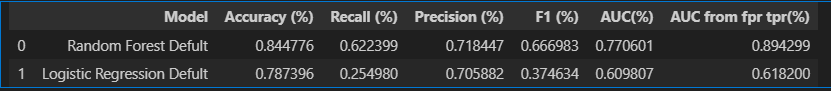

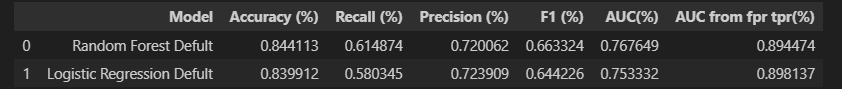

# CF

In [61]:
X_fit.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 36177 entries, 4727 to 35636
Data columns (total 11 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             36177 non-null  int64 
 1   workclass       36177 non-null  object
 2   fnlwgt          36177 non-null  int64 
 3   education-num   36177 non-null  int64 
 4   marital-status  36177 non-null  object
 5   relationship    36177 non-null  object
 6   race            36177 non-null  object
 7   sex             36177 non-null  object
 8   capital-gain    36177 non-null  int64 
 9   capital-loss    36177 non-null  int64 
 10  hours-per-week  36177 non-null  int64 
dtypes: int64(6), object(5)
memory usage: 3.3+ MB


In [62]:
def generate_counterfactuals(X_fit, y_fit, model,continuous_features, sample_size, total_CFs):
    # Create a Data object
    d = dice_ml.Data(dataframe=X_fit.assign(income=y_fit), continuous_features=continuous_features, outcome_name='income')

    # Create a Model object
    m = dice_ml.Model(model=model, backend="sklearn")

    # Generate counterfactuals
    exp = dice_ml.Dice(d, m, method="random")

    e1 = exp.generate_counterfactuals(X_fit[0:sample_size], total_CFs=total_CFs, desired_class="opposite")
    #e1.visualize_as_dataframe(show_only_changes=True)

    cf_df = pd.DataFrame()
    
    for i in range(0, sample_size):
        xd = e1.cf_examples_list[i].final_cfs_df
        cf_df = pd.concat([cf_df, xd])
    else:
        cf_df.to_csv('cf_df_{}_{}.csv'.format(sample_size, total_CFs))
        X_fit_cf = cf_df.drop(['income'], axis=1)
        y_fit_cf = cf_df['income']

    return exp, e1, cf_df, X_fit_cf, y_fit_cf

In [63]:
continuous_features = []

for j in [10, 100]:
    for i in [2, 5]:
        exp, e1, cf_df, X_fit_cf, y_fit_cf = generate_counterfactuals(X_fit, y_fit, model_RF,continuous_features, j, i)
        new_X_fit = pd.concat([X_fit, X_fit_cf])
        new_y_fit = pd.concat([y_fit, y_fit_cf])
        model_LR_cf, model_perf_metric_lr_cf = run_LR(new_X_fit, new_y_fit, X_test, y_test, '_{}_{}'.format(j, i))
        model_perf_metrics_merged = model_perf_metrics_merged.append(model_perf_metric_lr_cf, ignore_index=True)

100%|██████████| 10/10 [00:01<00:00,  5.83it/s]
C:\Users\dideu\AppData\Local\Temp\ipykernel_14584\386429165.py:9: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  model_perf_metrics_merged = model_perf_metrics_merged.append(model_perf_metric_lr_cf, ignore_index=True)
100%|██████████| 10/10 [00:02<00:00,  4.52it/s]
C:\Users\dideu\AppData\Local\Temp\ipykernel_14584\386429165.py:9: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  model_perf_metrics_merged = model_perf_metrics_merged.append(model_perf_metric_lr_cf, ignore_index=True)
100%|██████████| 100/100 [00:17<00:00,  5.62it/s]
C:\Users\dideu\AppData\Local\Temp\ipykernel_14584\386429165.py:9: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  model_perf_metrics_merged = model_perf_me

In [64]:
new_X_fit.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 36677 entries, 4727 to 4
Data columns (total 11 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             36677 non-null  int64 
 1   workclass       36677 non-null  object
 2   fnlwgt          36677 non-null  int64 
 3   education-num   36677 non-null  int64 
 4   marital-status  36677 non-null  object
 5   relationship    36677 non-null  object
 6   race            36677 non-null  object
 7   sex             36677 non-null  object
 8   capital-gain    36677 non-null  int64 
 9   capital-loss    36677 non-null  int64 
 10  hours-per-week  36677 non-null  int64 
dtypes: int64(6), object(5)
memory usage: 3.4+ MB


In [65]:
model_perf_metrics_merged

,Model,Accuracy (%),Recall (%),Precision (%),F1 (%),AUC(%)
0,RF default,0.842123,0.613103,0.714286,0.659838,0.765732
1,LR default,0.787396,0.254980,0.705882,0.374634,0.609807
2,LR _10_2,0.789386,0.255865,0.720698,0.377654,0.611428
3,LR _10_5,0.789497,0.255865,0.721598,0.377778,0.611502
4,LR _100_2,0.789276,0.258079,0.717097,0.379557,0.612093
5,LR _100_5,0.789055,0.260292,0.712727,0.381323,0.612684


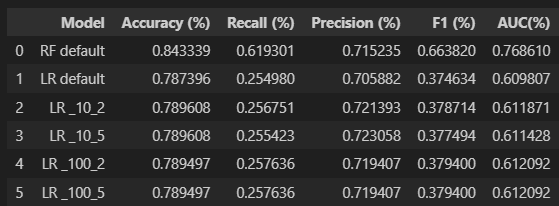

In [66]:
new_X_fit = pd.concat([X_fit, X_fit_cf])
new_y_fit = pd.concat([y_fit, y_fit_cf])

In [67]:
query_instance = X_fit[0:1]
imp = exp.local_feature_importance(query_instance, total_CFs=10)
print(imp.local_importance)

100%|██████████| 1/1 [00:00<00:00,  3.05it/s]

[{'age': 0.3, 'capital-loss': 0.3, 'hours-per-week': 0.3, 'fnlwgt': 0.1, 'education-num': 0.1, 'marital-status': 0.1, 'relationship': 0.1, 'race': 0.1, 'workclass': 0.0, 'sex': 0.0, 'capital-gain': 0.0}]


In [68]:
cf_df

,age,workclass,fnlwgt,education-num,marital-status,relationship,race,sex,capital-gain,capital-loss,hours-per-week,income
0,29,Private,114224,8,Never-married,Husband,White,Male,0,0,40,0
1,29,Private,214731,1,Married-civ-spouse,Husband,White,Male,0,0,40,0
2,85,Federal-gov,114224,13,Married-civ-spouse,Husband,White,Male,0,0,40,0
3,29,Private,114224,9,Married-civ-spouse,Husband,Asian-Pac-Islander,Male,0,0,40,0
4,29,Private,544319,13,Married-civ-spouse,Husband,White,Male,0,0,40,0
...,...,...,...,...,...,...,...,...,...,...,...,...
0,49,Self-emp-not-inc,164725,9,Married-civ-spouse,Wife,White,Female,3464,1977,35,1
1,27,Self-emp-not-inc,164725,9,Married-civ-spouse,Wife,White,Female,3464,2457,35,1
2,27,Self-emp-not-inc,164725,9,Married-AF-spouse,Wife,White,Female,7443,0,35,1
3,27,Self-emp-not-inc,164725,9,Married-civ-spouse,Wife,White,Female,3464,3004,35,1
